In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("TATAMOTORS.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-18,531.450012,534.200012,501.299988,509.700012,509.700012,47197742
1,2021-11-22,512.250000,512.250000,478.399994,486.100006,486.100006,40044849
2,2021-11-23,484.399994,499.350006,477.000000,495.500000,495.500000,27553684
3,2021-11-24,499.000000,501.799988,485.299988,488.649994,488.649994,20915837
4,2021-11-25,490.799988,495.149994,486.500000,492.750000,492.750000,15336539


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
243,2022-11-11,420.000000,425.500000,414.700012,423.500000,423.500000,19296401
244,2022-11-14,424.000000,437.700012,423.500000,433.700012,433.700012,17996083
245,2022-11-15,434.899994,438.500000,434.100006,437.149994,437.149994,10696024
246,2022-11-16,436.950012,438.200012,429.600006,431.549988,431.549988,8206169
247,2022-11-17,422.000000,427.549988,419.600006,423.149994,423.149994,15621809


In [5]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2021-11-18,531.450012,534.200012,501.299988,509.700012,509.700012,47197742
1,1,2021-11-22,512.250000,512.250000,478.399994,486.100006,486.100006,40044849
2,2,2021-11-23,484.399994,499.350006,477.000000,495.500000,495.500000,27553684
3,3,2021-11-24,499.000000,501.799988,485.299988,488.649994,488.649994,20915837
4,4,2021-11-25,490.799988,495.149994,486.500000,492.750000,492.750000,15336539


In [6]:
df=df.drop(["Date","Adj Close"],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,531.450012,534.200012,501.299988,509.700012,47197742
1,1,512.250000,512.250000,478.399994,486.100006,40044849
2,2,484.399994,499.350006,477.000000,495.500000,27553684
3,3,499.000000,501.799988,485.299988,488.649994,20915837
4,4,490.799988,495.149994,486.500000,492.750000,15336539


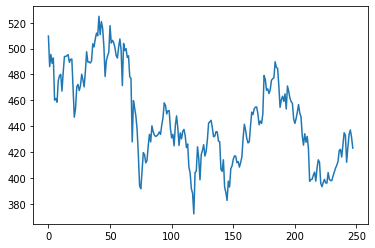

In [7]:
plt.plot(df.Close)

In [8]:
df


,index,Open,High,Low,Close,Volume
0,0,531.450012,534.200012,501.299988,509.700012,47197742
1,1,512.250000,512.250000,478.399994,486.100006,40044849
2,2,484.399994,499.350006,477.000000,495.500000,27553684
3,3,499.000000,501.799988,485.299988,488.649994,20915837
4,4,490.799988,495.149994,486.500000,492.750000,15336539
...,...,...,...,...,...,...
243,243,420.000000,425.500000,414.700012,423.500000,19296401
244,244,424.000000,437.700012,423.500000,433.700012,17996083
245,245,434.899994,438.500000,434.100006,437.149994,10696024
246,246,436.950012,438.200012,429.600006,431.549988,8206169


In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    432.2310
244    432.6785
245    433.2230
246    433.5625
247    433.8630
Name: Close, Length: 248, dtype: float64

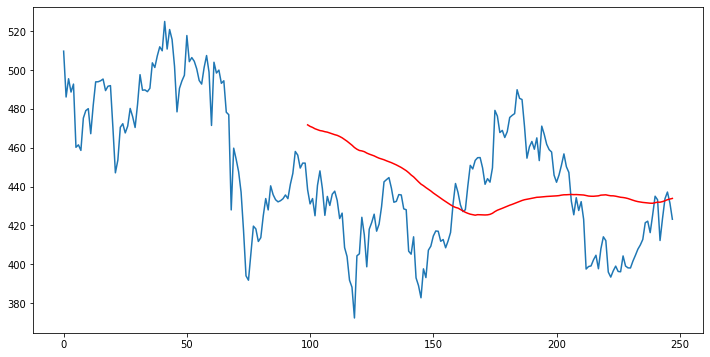

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")

In [11]:
ma200=df.Close.rolling(100).mean()
ma200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    432.2310
244    432.6785
245    433.2230
246    433.5625
247    433.8630
Name: Close, Length: 248, dtype: float64

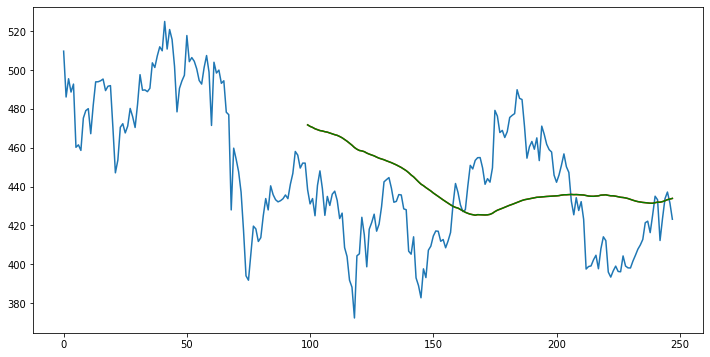

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(248, 6)

In [14]:
#split
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(173, 1)
(75, 1)


In [15]:
data_training.head()

,Close
0,509.700012
1,486.100006
2,495.500000
3,488.649994
4,492.750000


In [16]:
data_testing.head()

,Close
173,442.250000
174,449.600006
175,479.200012
176,476.250000
177,467.799988


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.89980362],
       [0.74525219],
       [0.80681076],
       [0.76195152],
       [0.78880159],
       [0.57563862],
       [0.5838246 ],
       [0.56516052],
       [0.6741978 ],
       [0.69941067],
       [0.70595946],
       [0.62148013],
       [0.71709228],
       [0.79633266],
       [0.79666021],
       [0.79993461],
       [0.80582848],
       [0.76686311],
       [0.78159788],
       [0.78356264],
       [0.6411265 ],
       [0.4895219 ],
       [0.53241658],
       [0.64309106],
       [0.65520635],
       [0.62409961],
       [0.64734773],
       [0.70661438],
       [0.67910939],
       [0.64243614],
       [0.72102159],
       [0.82056325],
       [0.76817295],
       [0.76915522],
       [0.76326135],
       [0.77472173],
       [0.8605109 ],
       [0.84479365],
       [0.88375901],
       [0.9145384 ],
       [0.90111326],
       [1.        ],
       [0.90700713],
       [0.97282237],
       [0.93909635],
       [0.8483956 ],
       [0.695154  ],
       [0.774

In [19]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
#ml model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
               
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
               
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
3/3 [==============================] - 4s 174ms/step - loss: 0.1233
Epoch 2/50
3/3 [==============================] - 1s 160ms/step - loss: 0.0961
Epoch 3/50
3/3 [==============================] - 1s 172ms/step - loss: 0.0492
Epoch 4/50
3/3 [==============================] - 1s 180ms/step - loss: 0.0210
Epoch 5/50
3/3 [==============================] - 1s 180ms/step - loss: 0.0273
Epoch 6/50
3/3 [==============================] - 1s 172ms/step - loss: 0.0204
Epoch 7/50
3/3 [==============================] - 1s 180ms/step - loss: 0.0235
Epoch 8/50
3/3 [==============================] - 1s 172ms/step - loss: 0.0244
Epoch 9/50
3/3 [==============================] - 1s 172ms/step - loss: 0.0155
Epoch 10/50
3/3 [==============================] - 1s 180ms/step - loss: 0.0226
Epoch 11/50
3/3 [==============================] - 1s 187ms/step - loss: 0.0178
Epoch 12/50
3/3 [==============================] - 1s 172ms/step - loss: 0.0178
Epoch 13/50
3/3 [==============================] 

In [24]:
model.save("keras_model")

INFO:tensorflow:Assets written to: keras_model\assets


In [25]:
data_testing.head()

,Close
173,442.250000
174,449.600006
175,479.200012
176,476.250000
177,467.799988


In [26]:
past_100_days=data_training.tail(100)

In [27]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\AAYUSH~1\AppData\Local\Temp/ipykernel_16492/3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [28]:
final_df.head()

,Close
0,417.250000
1,394.000000
2,391.750000
3,405.899994
4,419.600006


In [29]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.38239052],
       [0.18460237],
       [0.16546158],
       [0.28583582],
       [0.40238206],
       [0.39004678],
       [0.33517667],
       [0.3517652 ],
       [0.44746914],
       [0.52318154],
       [0.4734157 ],
       [0.57890266],
       [0.54019558],
       [0.51807754],
       [0.50871977],
       [0.51382403],
       [0.52233105],
       [0.53891958],
       [0.5227563 ],
       [0.58570817],
       [0.63334752],
       [0.72947671],
       [0.71331343],
       [0.65674181],
       [0.6784346 ],
       [0.6784346 ],
       [0.56146312],
       [0.49978725],
       [0.52318154],
       [0.44789465],
       [0.58060391],
       [0.64440654],
       [0.56614213],
       [0.4495959 ],
       [0.53253931],
       [0.49298174],
       [0.54232233],
       [0.55550836],
       [0.51510003],
       [0.43555937],
       [0.45937892],
       [0.30837937],
       [0.26924729],
       [0.16546158],
       [0.13483627],
       [0.        ],
       [0.27222454],
       [0.281

In [30]:
input_data.shape

(175, 1)

In [31]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(75, 100, 1)
(75,)


In [33]:
y_predicted=model.predict(x_test)

3/3 [==============================] - 1s 39ms/step


In [34]:
y_predicted.shape

(75, 1)

In [35]:
y_test

array([0.59506594, 0.65759257, 0.90940032, 0.88430452, 0.81242012,
       0.82177789, 0.79072733, 0.81624838, 0.8783495 , 0.88770727,
       0.89536354, 1.        , 0.96214367, 0.95703941, 0.83964268,
       0.70012765, 0.74989375, 0.77328805, 0.73925998, 0.78902583,
       0.68949388, 0.84049343, 0.80476386, 0.76095277, 0.73755847,
       0.7269247 , 0.62569125, 0.59464069, 0.6261165 , 0.66950234,
       0.71884294, 0.66269683, 0.63760103, 0.51212252, 0.45214816,
       0.5270098 , 0.47086344, 0.50957052, 0.43215662, 0.21437693,
       0.22543595, 0.22798821, 0.25478526, 0.2747768 , 0.21565293,
       0.30284986, 0.35559346, 0.33900468, 0.20119116, 0.17907286,
       0.20629516, 0.22713746, 0.20374316, 0.20246716, 0.27179929,
       0.2275627 , 0.21948119, 0.21905569, 0.24925575, 0.2743513 ,
       0.30114861, 0.31986389, 0.34410894, 0.41726934, 0.42407485,
       0.3738835 , 0.4512974 , 0.53339007, 0.51765203, 0.33943018,
       0.43555937, 0.52233105, 0.5516801 , 0.50404076, 0.43258

In [36]:
y_predicted

array([[0.33247486],
       [0.33253375],
       [0.33256322],
       [0.33262268],
       [0.33276424],
       [0.33300236],
       [0.33333337],
       [0.3337358 ],
       [0.3341889 ],
       [0.33468607],
       [0.33522275],
       [0.33579352],
       [0.33641204],
       [0.3370785 ],
       [0.33778334],
       [0.33848658],
       [0.33912167],
       [0.33964598],
       [0.3400428 ],
       [0.34030545],
       [0.3404487 ],
       [0.34047422],
       [0.34041846],
       [0.34031287],
       [0.34017345],
       [0.34000543],
       [0.33980998],
       [0.33956882],
       [0.33926338],
       [0.33889017],
       [0.33846366],
       [0.3380129 ],
       [0.33755562],
       [0.33709964],
       [0.33662647],
       [0.33610693],
       [0.3355356 ],
       [0.3349094 ],
       [0.33424026],
       [0.33353165],
       [0.33277085],
       [0.33195874],
       [0.33111224],
       [0.3302618 ],
       [0.32944635],
       [0.32870188],
       [0.3280651 ],
       [0.327

In [37]:
scaler.scale_

array([0.00850702])

In [38]:
scale_factor=1/0.0122459
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

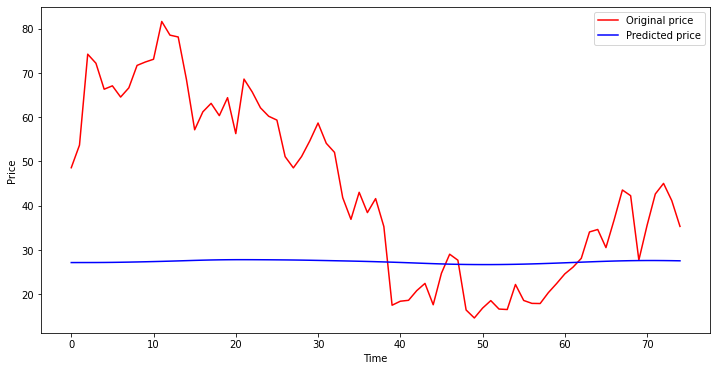

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"r",label="Original price")
plt.plot(y_predicted,"b",label='Predicted price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()